In [1]:
import pandas as pd
df=pd.read_excel('datas.xlsx')
df

,Date,Open,High,Low,Close,Volume
0,2021-04-05 15:30:00,92.40,93.75,89.2,93.75,26119543.0
1,2021-04-06 15:30:00,97.90,98.40,97.5,98.40,3367192.0
2,2021-04-07 15:30:00,103.30,103.30,95.5,99.95,60992792.0
3,2021-04-08 15:30:00,100.60,102.00,96.8,97.40,19905893.0
4,2021-04-09 15:30:00,97.40,99.80,94.6,97.65,18604791.0
...,...,...,...,...,...,...
627,2023-10-16 15:30:00,341.10,343.65,327.0,329.65,5569553.0
628,2023-10-17 15:30:00,331.95,344.40,331.9,335.50,4646955.0
629,2023-10-18 15:30:00,337.00,339.70,332.0,333.95,2269766.0
630,2023-10-19 15:30:00,333.90,346.70,331.0,344.45,5032636.0


In [2]:
df =df[['Date','Close']]
df

,Date,Close
0,2021-04-05 15:30:00,93.75
1,2021-04-06 15:30:00,98.40
2,2021-04-07 15:30:00,99.95
3,2021-04-08 15:30:00,97.40
4,2021-04-09 15:30:00,97.65
...,...,...
627,2023-10-16 15:30:00,329.65
628,2023-10-17 15:30:00,335.50
629,2023-10-18 15:30:00,333.95
630,2023-10-19 15:30:00,344.45


In [3]:
df['Date']

0     2021-04-05 15:30:00
1     2021-04-06 15:30:00
2     2021-04-07 15:30:00
3     2021-04-08 15:30:00
4     2021-04-09 15:30:00
              ...        
627   2023-10-16 15:30:00
628   2023-10-17 15:30:00
629   2023-10-18 15:30:00
630   2023-10-19 15:30:00
631   2023-10-20 15:30:00
Name: Date, Length: 632, dtype: datetime64[ns]

In [4]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2021-04-05 15:30:00,93.75
1,2021-04-06 15:30:00,98.40
2,2021-04-07 15:30:00,99.95
3,2021-04-08 15:30:00,97.40
4,2021-04-09 15:30:00,97.65
...,...,...
627,2023-10-16 15:30:00,329.65
628,2023-10-17 15:30:00,335.50
629,2023-10-18 15:30:00,333.95
630,2023-10-19 15:30:00,344.45


In [7]:
# df['Date']= df['Date'].apply(str_to_datetime)
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

C:\Users\Tejas\AppData\Local\Temp\ipykernel_2684\1845543161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


0     2021-04-05 15:30:00
1     2021-04-06 15:30:00
2     2021-04-07 15:30:00
3     2021-04-08 15:30:00
4     2021-04-09 15:30:00
              ...        
627   2023-10-16 15:30:00
628   2023-10-17 15:30:00
629   2023-10-18 15:30:00
630   2023-10-19 15:30:00
631   2023-10-20 15:30:00
Name: Date, Length: 632, dtype: datetime64[ns]

In [8]:
df.index=df.pop('Date')
df

,Close
Date,
2021-04-05 15:30:00,93.75
2021-04-06 15:30:00,98.40
2021-04-07 15:30:00,99.95
2021-04-08 15:30:00,97.40
2021-04-09 15:30:00,97.65
...,...
2023-10-16 15:30:00,329.65
2023-10-17 15:30:00,335.50
2023-10-18 15:30:00,333.95


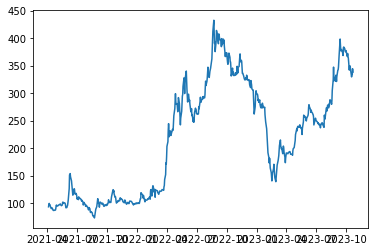

In [9]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [11]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
date1 = '2021-05-25'
date2 = '2022-03-23'
windowed_df = df_to_windowed_df(df, 
                                date1, 
                                date2, 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-05-25,102.40,100.10,101.10,101.05
1,2021-05-26,100.10,101.10,101.05,100.40
2,2021-05-27,101.10,101.05,100.40,99.25
3,2021-05-28,101.05,100.40,99.25,95.15
4,2021-05-31,100.40,99.25,95.15,91.95
...,...,...,...,...,...
203,2022-03-16,122.50,121.80,122.15,122.30
204,2022-03-17,121.80,122.15,122.30,122.90
205,2022-03-21,122.15,122.30,122.90,125.10
206,2022-03-22,122.30,122.90,125.10,124.55


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((208,), (208, 3, 1), (208,))

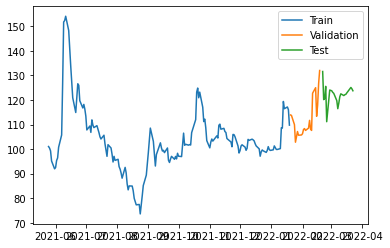

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 118ms/step - loss: 10967.8701 - mean_absolute_error: 103.9168 - val_loss: 12662.5645 - val_mean_absolute_error: 112.2611
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 10878.1113 - mean_absolute_error: 103.4854 - val_loss: 12567.4258 - val_mean_absolute_error: 111.8367
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 10792.3350 - mean_absolute_error: 103.0710 - val_loss: 12481.6650 - val_mean_absolute_error: 111.4525
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 10711.4424 - mean_absolute_error: 102.6739 - val_loss: 12381.8203 - val_mean_absolute_error: 111.0035
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 10608.4971 - mean_absolute_error: 102.1694 - val_loss: 12248.4727 - val_mean_absolute_error: 110.4008
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 10465.4590 - mean_absolute_error: 101.4669 - val_loss: 12054.1

Epoch 50/100
6/6 [==============================] - 0s 7ms/step - loss: 40.6601 - mean_absolute_error: 3.8539 - val_loss: 46.4307 - val_mean_absolute_error: 5.1327
Epoch 51/100
6/6 [==============================] - 0s 9ms/step - loss: 41.5941 - mean_absolute_error: 3.9132 - val_loss: 32.0555 - val_mean_absolute_error: 4.5292
Epoch 52/100
6/6 [==============================] - 0s 8ms/step - loss: 38.2337 - mean_absolute_error: 3.6560 - val_loss: 37.9514 - val_mean_absolute_error: 4.5132
Epoch 53/100
6/6 [==============================] - 0s 7ms/step - loss: 37.6244 - mean_absolute_error: 3.8908 - val_loss: 35.9021 - val_mean_absolute_error: 4.3630
Epoch 54/100
6/6 [==============================] - 0s 8ms/step - loss: 38.0697 - mean_absolute_error: 3.6456 - val_loss: 29.8190 - val_mean_absolute_error: 4.2208
Epoch 55/100
6/6 [==============================] - 0s 8ms/step - loss: 36.1295 - mean_absolute_error: 4.1016 - val_loss: 40.3004 - val_mean_absolute_error: 4.8317
Epoch 56/100
6/6

Epoch 100/100
6/6 [==============================] - 0s 9ms/step - loss: 16.7798 - mean_absolute_error: 2.9420 - val_loss: 32.4512 - val_mean_absolute_error: 4.1141


6/6 [==============================] - 1s 1ms/step


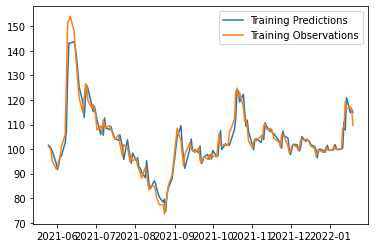

In [15]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 19ms/step


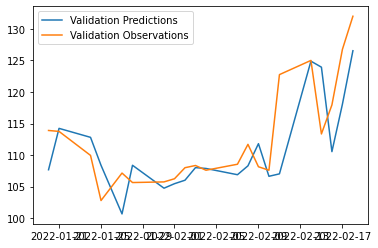

In [16]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 20ms/step


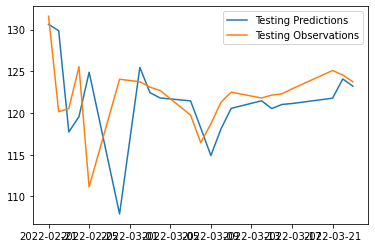

In [17]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

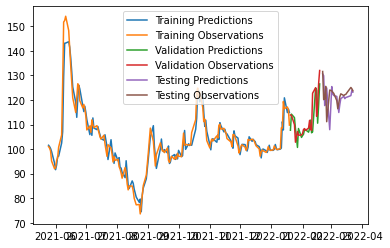

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [19]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 18ms/step


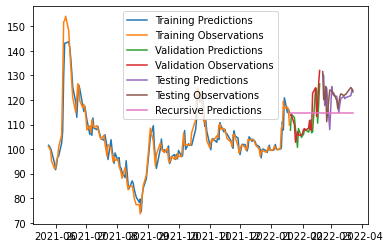

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])